## Classification Models
- K Nearest Neighbors
- Logistic Regression
- Decision Tree
- Random Forest

### K Nearest Neighbor Classifier
- KNN is simple algorithm which is easy to understand and implement.
- Main drawback is, the ececution and prediction will becom slow if dataset contains large amount of data.

#### How does KNN works
- Step1: Select k no of neighbors, K = 3,4,5....
- Step2: Calculte the distance between data point and nearest neighbors
    - Euclidian distance: Sqrt( (X2 - X1)^2 + (Y2 - Y1)^2)
- Step3: Assign the new data point to the majority nearest neighbor class

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nagamounika5/Datasets/master/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum().sum()

0

In [4]:
df['species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [5]:
X1 = df.iloc[:,[0,1,2,3]] # Independent variables
Y1 = df['species'] # Target

In [6]:
X1.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
## Apply KNN modle to iris dataset

from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn1 = KNeighborsClassifier()
knn1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
knn1.fit(X1,Y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [12]:
Y_predict1 = knn1.predict(X1)
Y_predict1

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

### Evaluation Metrics for classification
- Confusion matrix
- Accuracy

- **Confusion Matrix**
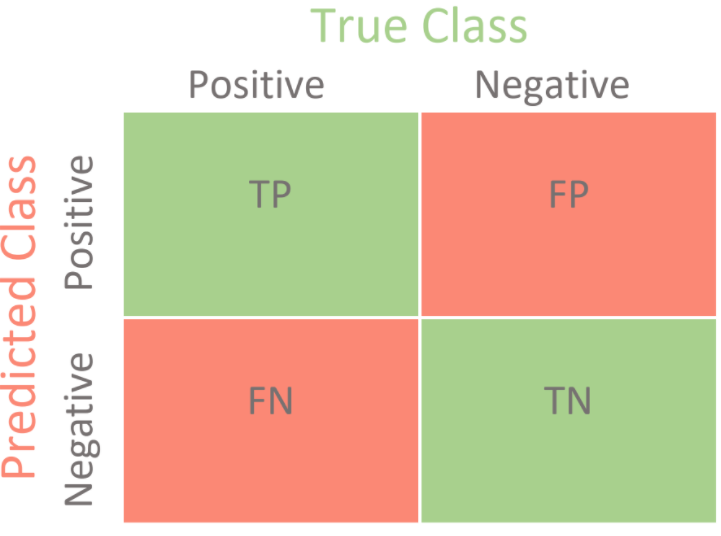


In [13]:
## Confusion Matrix
#===================

# Cats = 50, Birds = 50, Human = 50

###         Cats          Birds            Human
### Cats    50              0                0
### Birds    0             48                2
### Human    0             5                 45


## Accuracy
#===========

##                            TP + TN
##   Accuracy score = -----------------------------
##                       TP + TN + FP + FN

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y1, Y_predict1)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(Y1, Y_predict1)

0.96

In [16]:
# To improve the model, increase K = 3 to 5
knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
knn2.fit(X1,Y1)
Y_predict2 = knn2.predict(X1)

In [18]:
## Confusion matrix
confusion_matrix(Y1, Y_predict2)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

In [19]:
## Accuracy
accuracy_score(Y1, Y_predict2)

0.9666666666666667

### Logistic Regression
- Logistic Regression is classification model.
- It find the relationship between variables by estimating the probilities using Sigmoid function.
    - email is spam or not spam.
    
#### How does Logistic regression works
- Logistic regression is similar to Linear regression. 
    - But linear regression predicts continous values not classification. If we linear regression to classified values, then will face wrong predictions.
- We need to convert the continous values range into 0 to 1.  Logistic regression uses Sigmoid function

#### Sigmoid function
- S-shape curve
- It converts any line into curve

In [20]:
#  Sigmoid Formula
# ==================

##                1
## g(x) = --------------------
##          1 + e^(-y)


## Where y = b0 + b1*x

# It will apply the above formula in place of y in sigmoid


##                1
## g(x) = --------------------
##          1 + e^(-(b0 + b1*x))

### Types of Logistic Regression
- Binary Logistic Regression : Target column contains only 2 classifier
    - eg: spam or not
- Multinomial Logistic Regression: Target column contains more than 2 categorical classifiers
    - eg: happy, normal, sad
- Ordinal Logistic Regression: Target column contains more than 2 numerical classifiers
    - eg: ratings--> 1,2,3,4,5
    - eg2: nof of rooms in house --> 1,2,3

In [ ]:
###   please take break for 5 min